In [1]:
import os,random,cv2
import matplotlib
import matplotlib.pyplot as plt

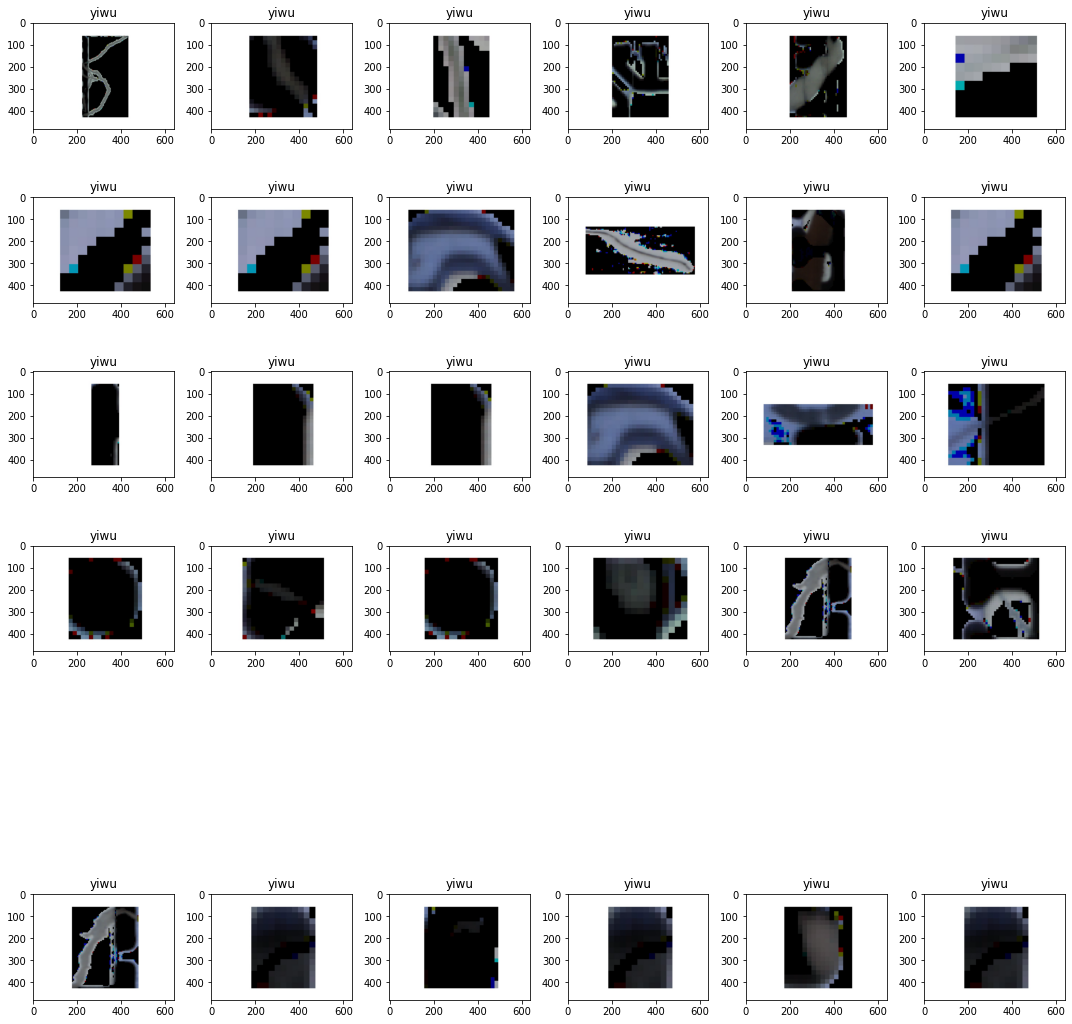

In [4]:
classes={"0": "lianjiao", "1": "shakong", "2": "guoshi", "3": "huashang", "4":"yanghua", "5":"tongheidian", "6":"heidian", "7":"feilinjiao", "8":"wuzi", "9":"yiwu"}
image_name="Padim_results_image_label_for_classification.txt"
choose_label=9
view_list=[]
show_size=6
num=1
with open(image_name,"r") as fid:
    image_label=fid.readlines()
    for line in image_label:
        image_name= line.split(" ")[0]
        label= line.split(" ")[-1].strip()
        if int(label)==choose_label:
            view_list.append(image_name)
    slices=random.sample(view_list,show_size**2)
    for image_name in slices:
        fig = matplotlib.pyplot.gcf()
        fig.set_size_inches(15, 15)
        plt.tight_layout()
        image=cv2.imread(os.path.join("/git/PaDiM-master",image_name))
        ax=plt.subplot(show_size,show_size,num)
        ax.set_title(classes[str(choose_label)])
        plt.imshow(image)
        num+=1
        
            

In [5]:
ls

Padim_data_for_classification_prepare.ipynb       train.json
Padim_results_image_label_for_classification.txt  train.txt
image_label_for_classification.txt                val.json
test.json                                         val.txt
test.txt                                          view_anomaly_class.py*
